In [1]:
library(tidyverse)
library(magrittr)
library(MASS)
plotsize = function (x,y) options(repr.plot.width=x, repr.plot.height=y)

Warning message:
: package ‘tidyverse’ was built under R version 3.2.5Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
: package ‘ggplot2’ was built under R version 3.2.5Warning message:
: package ‘tibble’ was built under R version 3.2.5Warning message:
: package ‘tidyr’ was built under R version 3.2.5Warning message:
: package ‘readr’ was built under R version 3.2.5Warning message:
: package ‘purrr’ was built under R version 3.2.5Warning message:
: package ‘dplyr’ was built under R version 3.2.5Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

 

In [2]:
rand_sigma <- function (n, ev = runif(n, 0, 10)) {
    Z <- matrix(ncol=n, rnorm(n^2))
    decomp <- qr(Z)
    Q <- qr.Q(decomp) 
    R <- qr.R(decomp)
    d <- diag(R)
    ph <- d / abs(d)
    O <- Q %*% diag(ph)
    Z <- t(O) %*% diag(ev) %*% O
    return(Z)
}

In [3]:
logit = function(p) log(p/1-p)
logistic = function(x) 1/(1+exp(-x))

## Logistic Regression Example

In [4]:
n = 100
p = 5
DATA = mvrnorm(n, rep(0,p), rand_sigma(p)) %>% 
    data.frame %>%
    mutate(Y = rbinom(n,1,logistic(2.5*X3 + X4 - X1 + 0.1*X5)))

Warning message:
: package ‘bindrcpp’ was built under R version 3.2.5

In [5]:
fit = glm(Y~., data=DATA, family=binomial(link='logit'))
fit %>% summary
fit %>% confint


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = DATA)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.39199  -0.12416   0.00000   0.05613   1.83121  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8836     0.5881  -1.503 0.132937    
X1           -1.7649     0.6517  -2.708 0.006766 ** 
X2            0.3774     0.3095   1.219 0.222681    
X3            3.7218     0.9940   3.744 0.000181 ***
X4            1.9873     0.7203   2.759 0.005799 ** 
X5            0.2076     0.3815   0.544 0.586424    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  30.445  on 94  degrees of freedom
AIC: 42.445

Number of Fisher Scoring iterations: 8


Waiting for profiling to be done...
Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities num

,2.5 %,97.5 %
(Intercept),-2.1588537,0.2292551
X1,-3.3335453,-0.6649237
X2,-0.198212,1.061575
X3,2.200124,6.271502
X4,0.8181419,3.7623960
X5,-0.5093781,1.0513811


## Example with correlated predictors

In [11]:
n = 100
p = 3
sigma = matrix(c(1,0,0,
               0, 1, 0.95,
               0, 0.95, 1), nrow=3)
DATA = mvrnorm(n, c(0,0,0), sigma) %>% 
    data.frame %>%
    mutate(Y = rbinom(n,1,logistic(X3 -0.5*X1)))

In [12]:
fit = glm(Y~., data=DATA, family=binomial(link='logit'))
fit %>% summary
fit %>% confint


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = DATA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3716  -0.8688   0.4637   0.9198   1.8438  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.2997     0.2349   1.276   0.2019  
X1           -0.5299     0.2599  -2.039   0.0415 *
X2            0.4501     0.7609   0.592   0.5542  
X3            0.6914     0.7744   0.893   0.3719  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.06  on 99  degrees of freedom
Residual deviance: 108.05  on 96  degrees of freedom
AIC: 116.05

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.1584572,0.7684045
X1,-1.06315578,-0.03447326
X2,-1.047346,1.987283
X3,-0.8290038,2.2582850


## logistic regression with one categorical predictor, chi-squared test, and fisher exact test

In [13]:
n = 100
DATA = data.frame(X = rbinom(n,1,0.3)) %>%
    mutate(Y = rbinom(n,1,logistic(1.4*X)))

,X,Y
1,0,1
2,0,0
3,1,1
4,0,1
5,0,1
6,0,0


   Y
X    0  1
  0 35 31
  1  8 26

,X,X0,X1
1,0,35,31
2,1,8,26


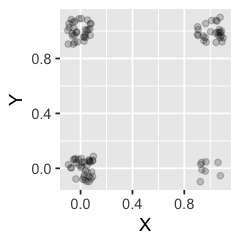

In [14]:
plotsize(2,2)
DATA %>% head
DATA %>% ggplot(aes(x=X,y=Y)) + geom_jitter(width=0.1,height=0.1, alpha=0.2)
DATA %>% table
DATA %>% group_by(Y,X) %>% 
    summarize(count=n()) %>% 
    spread(Y,count) %>% 
    data.frame

In [16]:
fit = glm(Y~., data=DATA, family=binomial(link='logit')) 
fit %>% summary
fit %>% confint %>% exp
DATA %$% fisher.test(X,Y)
DATA %$% chisq.test(X,Y)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = DATA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7011  -1.1263   0.7325   1.2294   1.2294  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.1214     0.2466  -0.492  0.62267   
X             1.3000     0.4736   2.745  0.00605 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 128.35  on 98  degrees of freedom
AIC: 132.35

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.5436185,1.4362425
X,1.499441,9.766383



	Fisher's Exact Test for Count Data

data:  X and Y
p-value = 0.005673
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.346274 10.676492
sample estimates:
odds ratio 
  3.621697 



	Pearson's Chi-squared test with Yates' continuity correction

data:  X and Y
X-squared = 6.8098, df = 1, p-value = 0.009066
